In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
 INT=pd.read_csv('C:/Users/mjc341/desktop/TESTPY/INQ2.csv',skipfooter=5,encoding='latin-1',engine ='python')

In [21]:
len(INT)

1338885

In [22]:
INT.columns

Index(['Contact.Account ID', 'Contact', 'Interaction: Created Date',
       'Lead Source', 'Term'],
      dtype='object')

In [23]:
INT.columns =['Contact_ID','Name','CreateDate','LeadSource','Term']

In [24]:
INT.columns

Index(['Contact_ID', 'Name', 'CreateDate', 'LeadSource', 'Term'], dtype='object')

In [25]:
INT.dtypes

Contact_ID    object
Name          object
CreateDate    object
LeadSource    object
Term          object
dtype: object

Text(0.5,1,'Count of Contact by Lead Source')

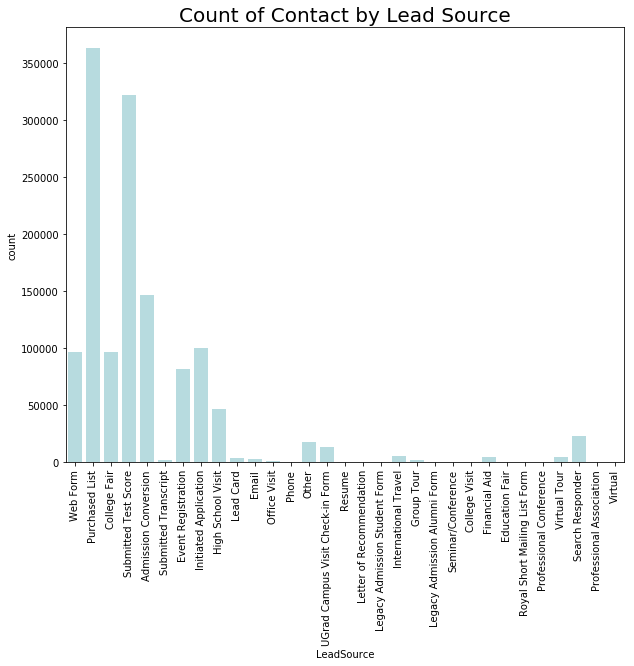

In [26]:
f,ax =plt.subplots(figsize = (10,8))
sns.countplot(x = 'LeadSource', data =INT,color = 'powderblue')
plt.xticks(rotation = 90)
plt.title('Count of Contact by Lead Source', loc = 'center', size = 20)

In [27]:
INT['CreateDate']= pd.to_datetime(INT.CreateDate)

In [28]:
INT.dtypes

Contact_ID            object
Name                  object
CreateDate    datetime64[ns]
LeadSource            object
Term                  object
dtype: object

In [31]:
INT['CreateDate'].min()

Timestamp('2001-08-06 00:00:00')

In [40]:
rng = pd.date_range('12/1/2001',periods = 18,freq = 'Y')

In [41]:
rng

DatetimeIndex(['2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [42]:
INT.head(3)

,Contact_ID,Name,CreateDate,LeadSource,Term
0,0011500001KrnniAAB,Daphna Nicolas,2016-04-15,Web Form,Fall 2016
1,0011500001Jc5k4AAB,Taylor Gouterman,2012-03-02,Purchased List,Fall 2015
2,0011500001Jb2GjAAJ,Charles Underwood,2012-03-06,Purchased List,Fall 2014


In [44]:
INT2017 = INT.loc[(INT.Term == 'Fall 2017')]

In [46]:
ts1 = pd.Timestamp ('6/30/2016')

In [47]:
ts1

Timestamp('2016-06-30 00:00:00')

In [49]:
COUNT2017 = INT2017.loc[INT2017.CreateDate <= ts1, :]

In [50]:
len(COUNT2017)

86164

In [51]:
ts2= pd.Timestamp ('6/30/2017')

In [53]:
INT2018 = INT.loc[(INT.Term == 'Fall 2018')]

In [54]:
COUNT2018 = INT2018.loc[INT2018.CreateDate <= ts2, :]

In [56]:
len(COUNT2018)

70423

Text(0.5,1,'FAll 2017 Count of Contact by Lead Source')

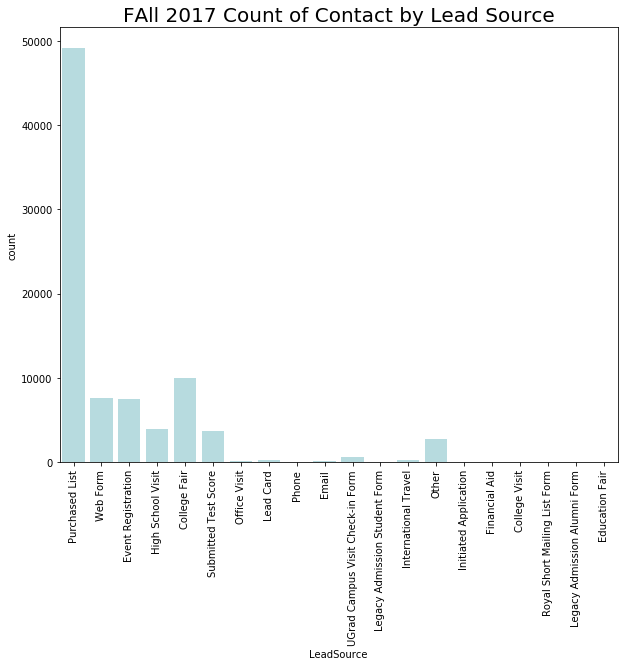

In [63]:
f,ax =plt.subplots(figsize = (10,8))
sns.countplot(x = 'LeadSource', data =COUNT2017,color = 'powderblue')
plt.xticks(rotation = 90)
plt.title('FAll 2017 Count of Contact by Lead Source', loc = 'center', size = 20)


Text(0.5,1,'FAll 2018 Count of Contact by Lead Source')

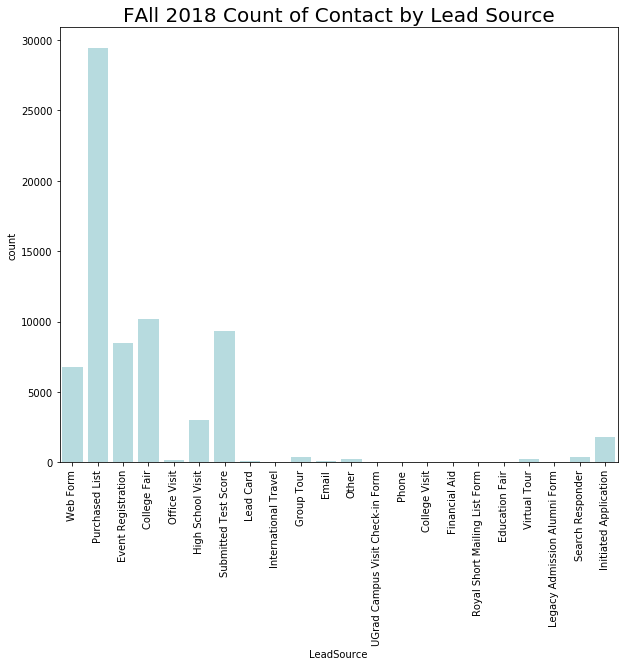

In [59]:
f,ax =plt.subplots(figsize = (10,8))
sns.countplot(x = 'LeadSource', data =COUNT2018,color = 'powderblue')
plt.xticks(rotation = 90)
plt.title('FAll 2018 Count of Contact by Lead Source', loc = 'center', size = 20)

In [64]:
ts3= pd.Timestamp ('6/30/2018')

In [65]:
INT2019 = INT.loc[(INT.Term == 'Fall 2019')]

In [66]:
len(INT2019)

75195

In [67]:
COUNT2019 = INT2019.loc[INT2019.CreateDate <= ts3, :]

In [68]:
len(COUNT2019)

72682

In [70]:
COUNT2017['LeadSource'].value_counts()

Purchased List                      49132
College Fair                        10011
Web Form                             7583
Event Registration                   7477
High School Visit                    4000
Submitted Test Score                 3663
Other                                2766
UGrad Campus Visit Check-in Form      570
Lead Card                             296
International Travel                  243
Email                                 191
Office Visit                          126
Royal Short Mailing List Form          42
Phone                                  28
College Visit                          12
Education Fair                         10
Legacy Admission Student Form           5
Legacy Admission Alumni Form            4
Financial Aid                           3
Initiated Application                   2
Name: LeadSource, dtype: int64

In [71]:
COUNT2018['LeadSource'].value_counts()

Purchased List                      29420
College Fair                        10189
Submitted Test Score                 9316
Event Registration                   8441
Web Form                             6756
High School Visit                    2972
Initiated Application                1777
Group Tour                            370
Search Responder                      342
Other                                 225
Virtual Tour                          223
Office Visit                          164
Lead Card                              89
Email                                  60
International Travel                   40
College Visit                          17
Education Fair                          7
UGrad Campus Visit Check-in Form        4
Royal Short Mailing List Form           4
Phone                                   4
Financial Aid                           2
Legacy Admission Alumni Form            1
Name: LeadSource, dtype: int64

In [72]:
COUNT2019['LeadSource'].value_counts()

Purchased List              21975
Submitted Test Score        14526
Event Registration          10113
College Fair                 8377
Web Form                     7207
Search Responder             5689
High School Visit            2692
Virtual Tour                 1100
Group Tour                    461
Office Visit                  275
Lead Card                     139
Initiated Application          62
Email                          22
Education Fair                 13
College Visit                  11
Virtual                         9
Other                           6
Phone                           2
Professional Conference         1
International Travel            1
Professional Association        1
Name: LeadSource, dtype: int64

In [73]:
from pytz import common_timezones, all_timezones
print(len(common_timezones))

439


In [75]:
print(common_timezones[1:10])

['Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre']


In [76]:
#pass a naive timezone to  our timestamp
t_naive = pd.Timestamp('7/18/2018')
t_naive

Timestamp('2018-07-18 00:00:00')

In [77]:
t = t_naive.tz_localize(tz= 'US/Central')

In [78]:
t

Timestamp('2018-07-18 00:00:00-0500', tz='US/Central')

In [79]:
t.tz_convert('Asia/Tokyo')

Timestamp('2018-07-18 14:00:00+0900', tz='Asia/Tokyo')

In [80]:
t

Timestamp('2018-07-18 00:00:00-0500', tz='US/Central')